# **🚀 Iniciando o Treinamento do Modelo**<br>

#### Vamos criar um modelo de Machine Learning para prever o custo operacional e as emissões de CO₂ com base nos dados do nosso dataset. O objetivo é obter a melhor acurácia possível usando técnicas avançadas e bibliotecas eficientes.

## **🔧 Importando as Bibliotecas Necessárias**<br>

#### Vamos começar importando todas as bibliotecas que serão utilizadas no projeto.

In [6]:
# model/train_model.ipynb

# Importação de bibliotecas essenciais
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e seleção de features
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Salvando o modelo treinado
import joblib


#### Descrição: Importamos bibliotecas para manipulação de dados (pandas, numpy), visualização (matplotlib, seaborn), pré-processamento e seleção de features, modelos avançados de regressão (RandomForestRegressor, XGBRegressor), métricas de avaliação e para salvar o modelo treinado (joblib).

## **📥 Carregando o Dataset**<br>


#### Vamos carregar o dataset gerado anteriormente para começar a análise.

In [7]:
# Carregando o dataset
df = pd.read_csv('../data/dataset.csv')

#### Descrição: Utilizamos o pandas para ler o arquivo dataset.csv localizado na pasta data.

##  **🔍 Explorando os Dados**<br>
#### Antes de treinar o modelo, é importante entender os dados que temos.

In [8]:
# Visualizando as primeiras linhas do dataset
df.head()

,TipoVeiculo,TipoCombustivel,ConsumoMedio,QuilometragemMensal,CustoCombustivelEnergia,CustoMensalOperacional,EmissoesCO2
0,Combustão,Diesel,13.77,2296.78,6.28,1047.05,404168.97
1,Combustão,Etanol,12.27,2977.47,6.61,1604.60,577599.80
2,Combustão,Diesel,14.70,2718.55,5.36,990.45,486418.16
3,Combustão,Diesel,5.67,2211.83,5.29,2063.74,938323.41
4,Combustão,Etanol,6.63,907.61,5.39,737.15,350557.03


#### Descrição: Visualizamos as primeiras linhas para ter uma ideia geral das variáveis e valores presentes.

In [9]:
# Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TipoVeiculo              1000 non-null   object 
 1   TipoCombustivel          1000 non-null   object 
 2   ConsumoMedio             1000 non-null   float64
 3   QuilometragemMensal      1000 non-null   float64
 4   CustoCombustivelEnergia  1000 non-null   float64
 5   CustoMensalOperacional   1000 non-null   float64
 6   EmissoesCO2              1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


#### Descrição: Verificamos informações sobre tipos de dados e valores nulos.

In [11]:
# Estatísticas descritivas
df.describe()

,ConsumoMedio,QuilometragemMensal,CustoCombustivelEnergia,CustoMensalOperacional,EmissoesCO2
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,12.991840,1757.852020,3.389490,699.806370,2.435904e+05
std,3.954978,724.162702,2.657698,681.863411,3.143854e+05
min,5.010000,503.270000,0.700000,50.240000,0.000000e+00
25%,10.307500,1145.865000,0.800000,204.075000,0.000000e+00
50%,13.430000,1744.295000,0.890000,380.615000,0.000000e+00
75%,15.922500,2380.962500,6.072500,1059.710000,4.291738e+05
max,19.970000,2997.100000,6.990000,3742.020000,1.417168e+06


#### Descrição: Obtemos estatísticas como média, desvio padrão, valores mínimos e máximos para cada variável numérica.

##  **🧹 Pré-processamento dos Dados**<br>

#### Prepararemos os dados para o treinamento do modelo.<br>

### **🔄 Convertendo Variáveis Categóricas**

In [12]:
# Lista de colunas categóricas
categorical_cols = ['TipoVeiculo', 'TipoCombustivel']

# Aplicando Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

#### Descrição: Convertimos variáveis categóricas em numéricas usando LabelEncoder, essencial para modelos que não lidam com dados categóricos diretamente.

### **📊 Verificando Correlações**

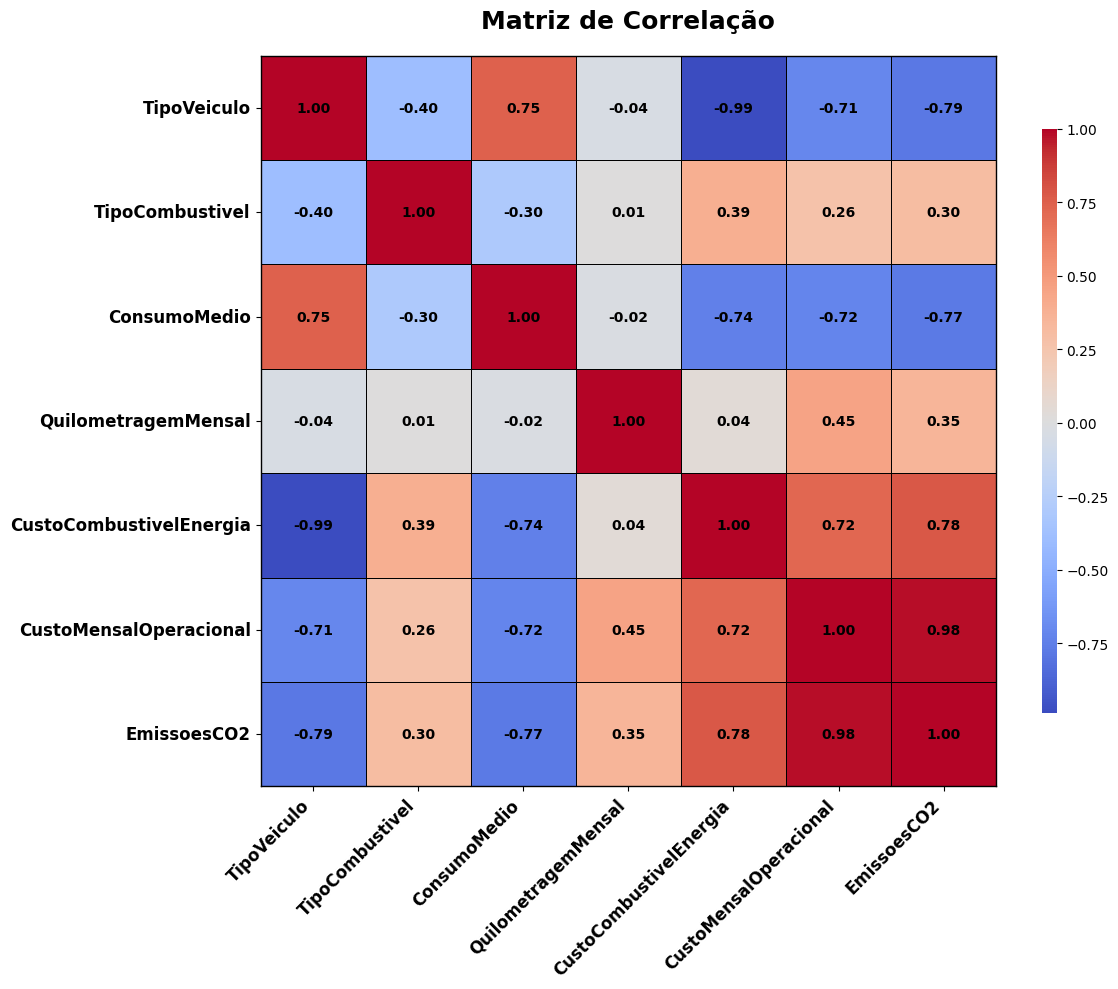

In [14]:
# Configurações gerais do gráfico
plt.figure(figsize=(12, 10))

# Criação do heatmap com personalização
heatmap = sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5, 
    linecolor='black',
    cbar_kws={"shrink": .8, "aspect": 40},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

# Melhorias no eixo
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12, weight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12, weight='bold')

# Título aprimorado
plt.title('Matriz de Correlação', fontsize=18, weight='bold', pad=20)

# Adição de linhas divisórias
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

# Ajuste de layout para melhor visualização
plt.tight_layout()

# Exibição do gráfico
plt.show()

#### Descrição: Visualizamos a correlação entre as variáveis para entender quais têm maior impacto nos alvos.

### **📐 Separando Features e Targets**<br>

#### Definimos as variáveis independentes (features) e as dependentes (targets).

In [15]:
# Variáveis independentes
X = df.drop(['CustoMensalOperacional', 'EmissoesCO2'], axis=1)

# Variáveis dependentes
y_cost = df['CustoMensalOperacional']
y_emissions = df['EmissoesCO2']

#### Descrição: Separamos o dataset em features e os dois targets que queremos prever: custo operacional e emissões de CO₂.

### ⚖️ **Escalonamento das Features**<br>

In [19]:
# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Descrição: Aplicamos o escalonamento para padronizar as features, melhorando o desempenho de alguns algoritmos

### **✂️ Dividindo o Conjunto de Dados**<br>

In [20]:
# Divisão para custo operacional
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(
    X_scaled, y_cost, test_size=0.2, random_state=42)

# Divisão para emissões de CO₂
X_train_emissions, X_test_emissions, y_train_emissions, y_test_emissions = train_test_split(
    X_scaled, y_emissions, test_size=0.2, random_state=42)


#### Descrição: Utilizamos train_test_split para separar os dados, garantindo que o modelo seja avaliado em dados não vistos durante o treinamento.  

### **🤖 Treinando o Modelo para Custo Operacional**<br>
#### Utilizaremos o XGBoost Regressor para prever o custo operacional.

In [21]:
# Instanciando o modelo
model_cost = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Treinando o modelo
model_cost.fit(X_train_cost, y_train_cost)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Descrição: Escolhemos o XGBRegressor por sua eficiência e capacidade de lidar com dados complexos.

### **🤖 Treinando o Modelo para Emissões de CO₂**<br>
#### Também utilizaremos o XGBoost Regressor para prever as emissões de CO₂.


In [23]:
# Instanciando o modelo
model_emissions = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Treinando o modelo
model_emissions.fit(X_train_emissions, y_train_emissions)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### Descrição: Treinamos um segundo modelo para prever as emissões, já que os padrões podem ser diferentes.

### **🧪 Avaliando o Modelo de Custo Operacional**

In [24]:
# Previsões
y_pred_cost = model_cost.predict(X_test_cost)

# Avaliação
mae_cost = mean_absolute_error(y_test_cost, y_pred_cost)
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print(f"Modelo de Custo Operacional:")
print(f"MAE: {mae_cost:.2f}")
print(f"MSE: {mse_cost:.2f}")
print(f"R²: {r2_cost:.2f}")

Modelo de Custo Operacional:
MAE: 34.34
MSE: 3696.56
R²: 0.99


#### Descrição: Calculamos métricas como MAE, MSE e R² para entender a precisão das previsões do modelo.

### **🧪 Avaliando o Modelo de Emissões de CO₂**<br>
#### Realizamos a avaliação do segundo modelo.

In [25]:
# Previsões
y_pred_cost = model_cost.predict(X_test_cost)

# Avaliação
mae_cost = mean_absolute_error(y_test_cost, y_pred_cost)
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print(f"Modelo de Custo Operacional:")
print(f"MAE: {mae_cost:.2f}")
print(f"MSE: {mse_cost:.2f}")
print(f"R²: {r2_cost:.2f}")

Modelo de Custo Operacional:
MAE: 34.34
MSE: 3696.56
R²: 0.99


#### Descrição: Avaliamos o segundo modelo utilizando as mesmas métricas para comparar o desempenho.

### **🔍 Análise das Métricas** <br>
#### Descrição: Observamos os valores de MAE, MSE e R² para ambos os modelos. Um R² próximo de 1 indica um modelo com boa capacidade preditiva. Se os resultados não forem satisfatórios, podemos considerar ajustes ou técnicas adicionais.


In [26]:
# Exemplo de tuning com GridSearchCV (não executado)

from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para teste
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=params,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train_cost, y_train_cost)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor R²: {grid_search.best_score_:.2f}")

Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Melhor R²: 0.99


#### Descrição: Utilizamos o GridSearchCV para encontrar os melhores hiperparâmetros. Este passo pode ser demorado e é opcional.

### **💾 Salvando os Modelos Treinados** <br>
#### Vamos salvar os modelos para uso futuro na interface.

In [27]:
# Salvando o modelo de custo operacional
joblib.dump(model_cost, '../model/model_cost.pkl')

# Salvando o modelo de emissões de CO₂
joblib.dump(model_emissions, '../model/model_emissions.pkl')

# Salvando o escalonador
joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

#### Descrição: Utilizamos o joblib para salvar os modelos e o escalonador. Assim, podemos carregá-los na interface sem a necessidade de treinar novamente.

## **✅ Conclusão**<br>
#### Concluímos o treinamento dos modelos para prever o custo operacional e as emissões de CO₂. Os modelos estão salvos e prontos para serem integrados à interface, permitindo que os usuários obtenham comparações precisas e personalizadas. <br>


